### Problem 1: Classification

`lab02_dataset_1.xlsx` contains 10,302 observations on various vehicles. You will use the observations in this dataset to train models that predict the usage of a vehicle. The input features which will be used for your training are *AGE, TRAVTIME, CAR_TYPE, OCCUPATION, EDUCATION* and your output label is the binary class *CAR_USE*, whose values are *Private* and *Commercial*.

### 1.a
For the 5 input features, drop any rows with missing values. Output the new length of the training dataset after you drop the missing values among the input features.

In [ ]:
# Import pandas
import pandas as pd

# Input file
file_path = "lab02_dataset_1.xlsx"
as2 = pd.read_excel(file_path) # dataframe: as2: "assignment2"

# Put all input features in a list
input_features = ["wheel-base", "length", "width", "curb-width", "engine-size", "bore", "stroke", "compression", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]

# Drop any rows with missing values in the input features as requirement
as2_clean = as2.dropna(subset=input_features)

# Print the new length of training dataset
old_length = len(as2)
new_length = len(as2_clean)
print(f'Old length of the dataset: {old_length}\nNew length after dropping missing values: {new_length}')

Old length of the dataset: 10302
New length after dropping missing values: 10295


### 1.b
We want to encode categorical features as an integer array. Look up which sklearn function will allow you to do that and apply that on the input features. Also, remember to standardize your encoded features using `fit_transform` to create your final dataset. Finally, perform a 80-20 split on your dataset (80% for training, 20% for testing).

In [ ]:
# Import pandas & sklearn
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Input file
file_path = "lab02_dataset_1.xlsx"
as2 = pd.read_excel(file_path)  # dataframe: as2: "assignment2"

# Put all input features in a list
input_features = ["AGE", "TRAVTIME", "CAR_TYPE", "OCCUPATION", "EDUCATION"]

# Drop the input features rows with missing values as 1.a
as2_clean = as2.dropna(subset=input_features)

# Apply LabelEncoder to transform categorical features into integer
le_CAR_TYPE = LabelEncoder()   # modify based on 1.e
le_OCCUPATION = LabelEncoder()
le_EDUCATION = LabelEncoder()

as2_clean["CAR_TYPE"] = le_CAR_TYPE.fit_transform(as2_clean["CAR_TYPE"])
as2_clean["OCCUPATION"] = le_OCCUPATION.fit_transform(as2_clean["OCCUPATION"])
as2_clean["EDUCATION"] = le_EDUCATION.fit_transform(as2_clean["EDUCATION"])

# # Print the encoded labels for 1.e
# print("Encoded labels for CAR_TYPE:", dict(zip(le_CAR_TYPE.classes_, le_CAR_TYPE.transform(le_CAR_TYPE.classes_))))
# print("Encoded labels for OCCUPATION:", dict(zip(le_OCCUPATION.classes_, le_OCCUPATION.transform(le_OCCUPATION.classes_))))
# print("Encoded labels for EDUCATION:", dict(zip(le_EDUCATION.classes_, le_EDUCATION.transform(le_EDUCATION.classes_))))

# Define input & output
x = as2_clean[input_features]
y = as2_clean["CAR_USE"] # output label

# Initialize StandardScaler for standardizing features
scaler = StandardScaler()

# Standardize the features as request
as2_clean[input_features] = scaler.fit_transform(as2_clean[input_features])

# Split the dataset into 80% training & 20% testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Print the shapes of the resulting datasets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (8236, 5)
X_test shape: (2059, 5)
y_train shape: (8236,)
y_test shape: (2059,)


/var/folders/46/wn523s0d3n92tl3b80xvrlqm0000gn/T/ipykernel_6495/1131972898.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  as2_clean["CAR_TYPE"] = le_CAR_TYPE.fit_transform(as2_clean["CAR_TYPE"])
/var/folders/46/wn523s0d3n92tl3b80xvrlqm0000gn/T/ipykernel_6495/1131972898.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  as2_clean["OCCUPATION"] = le_OCCUPATION.fit_transform(as2_clean["OCCUPATION"])
/var/folders/46/wn523s0d3n92tl3b80xvrlqm0000gn/T/ipykernel_6495/1131972898.py:23: SettingWithCopyWarning

### 1.c

i. Train a logistic regression model using `LogisticRegression`.

ii. Train a naive bayes model using `CategoricalNB` with a laplace smoothing of 0.5.

In [ ]:
# Import sklearn packages
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score

## i. Train a Logistic Regression model

# Initialize and train the logistic regression model
LR_model = LogisticRegression()

# Fit the model on the training data
LR_model.fit(X_train, y_train)

# Make predictions on the test data
LR_y_pred = LR_model.predict(X_test)

# Evaluate the model by checking accuracy
LR_accuracy = accuracy_score(y_test, LR_y_pred)
print(f'Logistic Regression Accuracy: {LR_accuracy:.4f}')

# ii. Train a Naive Bayes model (CategoricalNB) with Laplace smoothing (alpha = 0.5)
NB_model = CategoricalNB(alpha=0.5)

# Train the Naive Bayes model on the training set
NB_model.fit(X_train, y_train)

# Predict the output for the test set
NB_y_pred = NB_model.predict(X_test)

# Calculate the accuracy for Naive Bayes
NB_accuracy = accuracy_score(y_test, NB_y_pred)
print(f'Naive Bayes Accuracy: {NB_accuracy:.4f}')

Logistic Regression Accuracy: 0.6401
Naive Bayes Accuracy: 0.8611


### 1.d
Compute and output the `accuracy_score` for both the classification models you learned on the testing partition.

In [ ]:
from sklearn.metrics import accuracy_score

# Logistic Regression Accuracy
LR_accuracy = accuracy_score(y_test, LR_y_pred)
print(f'Logistic Regression Accuracy: {LR_accuracy * 100:.2f}%')

# Naive Bayes Accuracy
NB_accuracy = accuracy_score(y_test, NB_y_pred)
print(f'Naive Bayes Accuracy: {NB_accuracy * 100:.2f}%')

Logistic Regression Accuracy: 64.01%
Naive Bayes Accuracy: 86.11%


### 1.e

Let us study a few fictitious persons (test cases). Use the `CategoricalNB` model for this task.

Person 1, whose age is 45, has a travel time of 46, works in a Manager occupation, has an education level of Masters, and owns a Minivan.

Person 2, whose age is 51, has a travel time of 32, works in a Clerical occupation, has an education level of Below High Sc, and owns a Pickup.

Person 3, whose age is 25, has a travel time of 14, works in a Blue Collar occupation, has an education level of High School, and owns a SUV.

Display a datraframe that captures all the above information, alongwith two additional columns which will display the Car Use probabilities of these three people.

In [ ]:
# Define test cases
test_data = {
    "AGE": [45, 51, 25],
    "TRAVTIME": [46, 32, 14],
    "CAR_TYPE": ["Minivan", "Pickup", "SUV"],
    "OCCUPATION": ["Manager", "Clerical", "Blue Collar"],
    "EDUCATION": ["Masters", "Below High Sc", "High School"]
}

# Create DataFrame for test cases
test_df = pd.DataFrame(test_data)

# Manually mappings for categorical features as Training cases
car_type_mapping = {'Minivan': 0, 'Panel Truck': 1, 'Pickup': 2, 'SUV': 3, 'Sports Car': 4, 'Van': 5}
occupation_mapping = {'Blue Collar': 0, 'Clerical': 1, 'Doctor': 2, 'Home Maker': 3, 'Lawyer': 4, 'Manager': 5, 'Professional': 6, 'Student': 7, 'Unknown': 8}
education_mapping = {'Bachelors': 0, 'Below High Sc': 1, 'High School': 2, 'Masters': 3, 'PhD': 4}

# Map the encode of categorical_features
test_df["CAR_TYPE"] = test_df["CAR_TYPE"].map(car_type_mapping)
test_df["OCCUPATION"] = test_df["OCCUPATION"].map(occupation_mapping)
test_df["EDUCATION"] = test_df["EDUCATION"].map(education_mapping)

# Predict probabilities of CAR_USE for the test cases
probabilities = NB_model.predict_proba(test_df[input_features])

# Add probabilities to the test DataFrame
test_df["CAR_USE_Probabilities"] = probabilities.tolist()

# Display the final DataFrame with probabilities as request
print(test_df.head())

   AGE  TRAVTIME  CAR_TYPE  OCCUPATION  EDUCATION  \
0   45        46         0           5          3   
1   51        32         2           1          1   
2   25        14         3           0          2   

                       CAR_USE_Probabilities  
0  [0.06285412038204284, 0.9371458796179569]  
1  [0.20612625957281822, 0.7938737404271814]  
2   [0.6799539893382188, 0.3200460106617813]  


### 1.f
Generate a histogram of the predicted probabilities of *CAR_USE = Private* using the `CategoricalNB` model.  The bin width is 0.05.  The vertical axis is the proportion of all the observations.

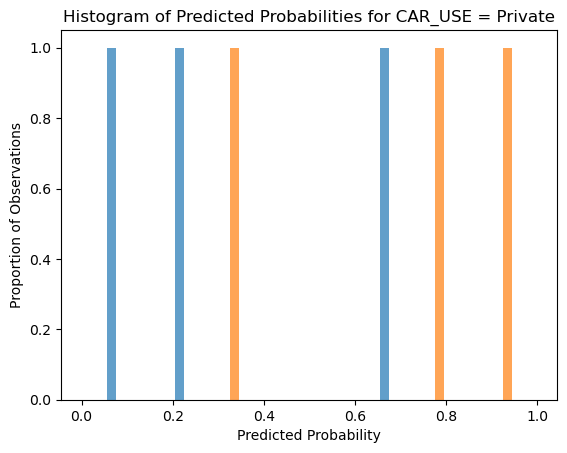

In [ ]:
import matplotlib.pyplot as plt

# predicted probabilities of CAR_USE = Private using the CategoricalNB model data completed at 1.e

# Plotting the histogram
plt.hist(probabilities,      # input
         bins=int(1/0.05),   # how many bins presented
         range=(0, 1),       # presented range (probability range in here)
         alpha=0.7           # transparency level
        )
plt.title('Histogram of Predicted Probabilities for CAR_USE = Private')
plt.xlabel('Predicted Probability')
plt.ylabel('Proportion of Observations')
plt.show()

### 1.g
Using a classification threshold of 0.6 i.e., the class with a probability >= 0.6 is the correct output, what is the misclassification rate (computed on all the observations) of the `CategoricalNB` model?

In [ ]:
# Import the required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Initialize LabelEncoder for the output label
le_y = LabelEncoder()

# Fit the label encoder on the original 'CAR_USE' column to ensure consistent mapping
le_y.fit(as2_clean["CAR_USE"])

# Transform the true labels in the test set
y_test_encoded = le_y.transform(y_test)

# Obtain predicted probabilities for the test set
NB_y_prob = NB_model.predict_proba(X_test)[:, 1]  # Probability of positive class = "Private"

# Apply the classification threshold of 0.6
threshold = 0.6
NB_y_pred_thresholded = (NB_y_prob >= threshold).astype(int)  # Convert probabilities to binary predictions

# Convert binary predictions back to original categorical labels
NB_y_pred = le_y.inverse_transform(NB_y_pred_thresholded)

# Calculate misclassification rate using NumPy
misclassifications = np.sum(NB_y_pred != y_test)  # Count where predictions do not match true labels
total_observations = len(y_test)  # Total number of observations in the test set

# Calculate the misclassification rate
misclassification_rate = misclassifications / total_observations

# Output the misclassification rate
print(f'Misclassification Rate: {misclassification_rate *100:.2f}%')

Misclassification Rate: 13.74%


### Problem 2: Linear Regression

`lab02_dataset_2.csv` contains 238 observations on customer purchase history. You will use the observations in this dataset to train models that predict the loyalty score of a customer. The input features which will be used for your training are *age, annual_income, purchase_amount, purchase_frequency* and your output label is *loyalty_score*.

### 2.a
Use the `MinMaxScaler` to transform the input features. Then apply a train-test split of 80-20 to generate the training and testing sets.

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Input file
file_path = "lab02_dataset_2.csv"
as2_2 = pd.read_csv(file_path)  # dataframe: as2: "assignment2"

# Define input features and output label
input_features = ["age", "annual_income", "purchase_amount", "purchase_frequency"]
x = as2_2[input_features]  # Input features
y = as2_2["loyalty_score"]  # Output label

# Apply MinMaxScaler to scale the input features
minmaxscaler = MinMaxScaler()
x_scaled = minmaxscaler.fit_transform(x)

# Split the dataset into 80% training & 20% testing
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (190, 4)
X_test shape: (48, 4)
y_train shape: (190,)
y_test shape: (48,)


### 2.b
Complete the empty functions inside the `myLinearRegression` class so that you can be perform linear regression without using sklearn. You are free to add additional helper functions if you need them. We will use a learning rate of 0.01 and 1000 training iterations for the learning task.

In [ ]:
# import numpy
import numpy as np

class myLinearRegression():
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None

    # Use the linear regression formulation as shown in the slides: W = W - (learning_rate/n)*sum[X(W.X - Y)]
    def fit(self, X, Y):
        # Number of training samples (n) and number of features (m)
        n_samples, n_features = X.shape

        # Initialize the weights and bias to 0
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent
        for i in range(self.iterations):
            # Predicted values using current weights and bias
            y_pred = np.dot(X, self.weights) + self.bias

            # Compute gradients for weights and bias
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - Y))  # Derivative wrt weights
            db = (1 / n_samples) * np.sum(y_pred - Y)  # Derivative wrt bias

            # Update the weights and bias using gradient descent
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    # Function to make predictions on new data
    def predict(self, X):
        # Predict values using the learned weights and bias
        return np.dot(X, self.weights) + self.bias

model = myLinearRegression(learning_rate=0.01, iterations=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)

[9.70936527 3.08492182 9.13212733 9.04068335 6.3570288  8.81641303
 5.45310341 8.05290846 7.92421116 6.74595384 4.33792712 9.04068335
 6.11527561 6.97152006 7.08957862 9.70936527 6.87465114 6.87465114
 5.83160084 4.36867073 5.57007719 4.80786852 4.36867073 9.70936527
 4.68438503 5.19157976 7.08957862 3.21361912 4.58881201 8.31443211
 7.53399021 9.04068335 4.80786852 8.05290846 8.57595575 4.80786852
 7.8199589  9.70936527 6.87465114 5.99755147 7.92421116 4.47292299
 6.97152006 4.33792712 3.21361912 9.04068335 9.58066796 3.21361912]


### 2.c
Compute and output the `mean_squared_error` between the prediction and the true test labels.

In [ ]:
# Initialize and train the model
model = myLinearRegression(learning_rate=0.01, iterations=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# # Print predictions and true test results side by side
# print("\nPredictions vs True Values:")
# for pred, true in zip(y_pred, y_test):
#     print(f"Predicted: {pred:.4f}, True: {true}")

# Compute Mean Squared Error (MSE)
mse = np.mean((y_test - y_pred) ** 2)

# Output the MSE
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 0.046968331102934635


### 2.d
Now using sklearn `SGDRegressor` and `LinearRegression` learn two corresponding models using the same training set and test it on the test set. Output the `mean_squared_error` of both the models.

In [ ]:
# import SGDRegressor, LinearRegression
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.metrics import mean_squared_error

## i.SGDRegressor
sgd_model = SGDRegressor()
sgd_model.fit(X_train, y_train)

# Make predictions on the test set
SGD_y_pred = sgd_model.predict(X_test)

# Compute Mean Squared Error for SGDRegressor
mse_sgd = mean_squared_error(y_test, SGD_y_pred)
print(f"SGDRegressor Mean Squared Error (MSE): {mse_sgd}")

## ii.LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the test set
LR_y_pred = linear_model.predict(X_test)

# Compute Mean Squared Error for LinearRegression
mse_linear = mean_squared_error(y_test, LR_y_pred)
print(f"LinearRegression Mean Squared Error (MSE): {mse_linear}")

SGDRegressor Mean Squared Error (MSE): 0.046716896592784586
LinearRegression Mean Squared Error (MSE): 0.03712571415557902


### Problem 3: Regularization

`lab02_dataset_3.csv` has 6,435 observations pertaining to Walmart sales and employment. The input features for your training task are *Weekly_Sales, Holiday_Flag, Temperature, Fuel_Price, CPI* and the output label is *Unemployment*. For this problem, you will be using regression with regularization.

### 3.a
Use the sklearn `StandardScaler` to transform the input features.

In [ ]:
# Import pandas, sklearn
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Input file
file_path = "lab02_dataset_3.csv"
as2_3 = pd.read_csv(file_path) # dataframe: as2: "assignment2"

# Define input & output features
input_features = ["Weekly_Sales", "Holiday_Flag", "Temperature", "Fuel_Price", "CPI"]
x = as2_3[input_features]  # Input features
y = as2_3["Unemployment"]  # Output label

# Initialize StandardScaler for standardizing features
standardscaler = StandardScaler()
x_scaled = standardscaler.fit_transform(x)

# Print first few rows of scaled features and target
print("Scaled Features:\n", x_scaled[:5])
print("Unemployment Target:\n", y.head())

Scaled Features:
 [[ 1.05741972 -0.27420425 -0.99513556 -1.71379998  1.00417522]
 [ 1.05434796  3.64691651 -1.20117022 -1.76608938  1.00788038]
 [ 1.00120591 -0.27420425 -1.12417832 -1.84016603  1.009074  ]
 [ 0.64282842 -0.27420425 -0.7609067  -1.73776595  1.00984902]
 [ 0.89991372 -0.27420425 -0.76795525 -1.59832755  1.01062404]]
Unemployment Target:
 0    8.106
1    8.106
2    8.106
3    8.106
4    8.106
Name: Unemployment, dtype: float64


## 3.b
Use sklearn ridge_regression with alpha=1.5 to compute the coefficients of the linear regression model. What are the two most important features (feature with the largest positive/negative weights are the most relevant)?

In [ ]:
#import ridge_regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2)

# Initialize ridge_regression with alpha=1.5
ridge_reg = Ridge(alpha=1.5)

# Fit the model to the training data
ridge_reg.fit(x_train, y_train)

# Get the coefficients
coefficients = ridge_reg.coef_

# Create a DataFrame to match coefficients with input features
coef_df = pd.DataFrame({
    "Feature": input_features,
    "Coefficient": coefficients
})

# Sort by absolute value of coefficients (most important)
sorted_coef_df = coef_df.reindex(coef_df.Coefficient.abs().sort_values(ascending=False).index)

print("Feature Importance (sorted by relevance):\n", sorted_coef_df)


Feature Importance (sorted by relevance):
         Feature  Coefficient
4           CPI    -0.654756
2   Temperature     0.327219
0  Weekly_Sales    -0.230130
3    Fuel_Price    -0.213101
1  Holiday_Flag     0.062278


Two most important features: CPI, Temperature

### 3.c
Compute the Pearson correlation coefficient between the input features and the output.

In [ ]:
# Concatenate inputs and output into one DataFrame
as2_3 = pd.concat([x, y], axis=1)

# Calculate the Correlation
correlation_matrix = as2_3.corr()

# Extract the correlation
correlation_with_unemployment = correlation_matrix["Unemployment"]

print("Pearson Correlation between input features and the Output-Umemployment:\n")
print(correlation_with_unemployment)

Pearson Correlation between input features and the Output-Umemployment:

Weekly_Sales   -0.106176
Holiday_Flag    0.010960
Temperature     0.101158
Fuel_Price     -0.034684
CPI            -0.302020
Unemployment    1.000000
Name: Unemployment, dtype: float64


The correlation coefficient aligns well with the feature importance as seen in 3.b. Yes or No? Yes

### 3.d
Create a correlation heatmap using the input features and the output.

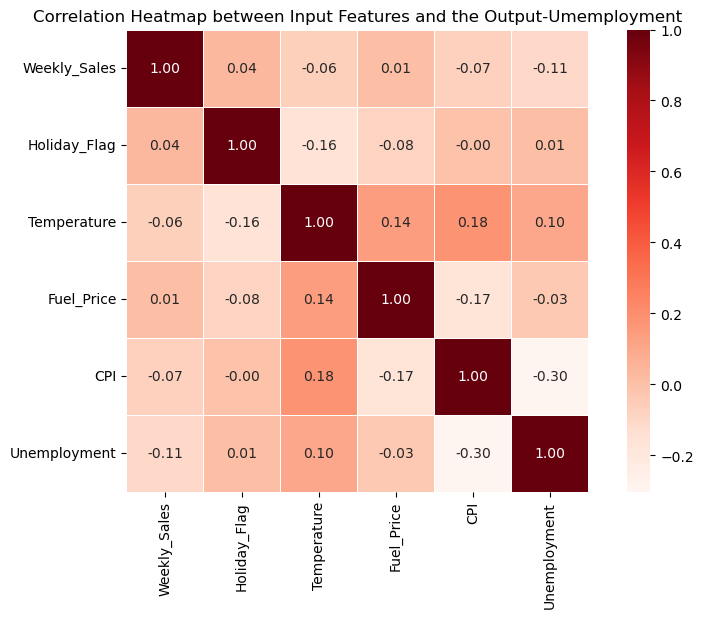

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation data completed at 3.c as correlation_matrix

# Plot size & Heatmap settings
plt.figure(figsize=(10, 6))
sns.heatmap(
    correlation_matrix,     # input
    annot=True,             # annot=True: display value on heatmap,
    fmt=".2f",              # text(value) format
    cmap='Reds',            # coolwarm':colormap from blue to red; viridis: colormap from yellow to purple; other color ie:Blues
    square=True,            # shape
    linewidths=0.5)         # linewidth in cells

# Title
plt.title("Correlation Heatmap between Input Features and the Output-Umemployment")

plt.show()